In [17]:
import pandas as pd
import h5py
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [18]:
dataset_path = glob.glob('/opt/workspace/data/MillionSongSubset/*/*/*/*.h5')
len(dataset_path)

10000

In [19]:
#The total size of files in the given dataset path
total_size = 0
for file in dataset_path:
    if os.path.isfile(file):
        total_size += os.path.getsize(file)
print("Total size of files: {:.2f} GB".format(total_size/(1024*1024*1024)))

Total size of files: 2.52 GB


In [20]:
#Reading and Parsing Metadata Information from MillionSongSubset Dataset
dataset_path = '/opt/workspace/data/MillionSongSubset/*/*/*/*.h5'
# creating an empty list to hold metadata information from all files
metadata_rows = []
# loop through each file in the dataset path
for file_path in glob.glob(dataset_path):
    with h5py.File(file_path, 'r') as f:
        metadata = f['/metadata/songs']
        column_names = list(metadata.dtype.names)
        metadata_dict = {}
        for column_name in column_names:
            metadata_dict[column_name] = metadata[column_name][0]
        metadata_rows.append(metadata_dict)
metadata_df = pd.DataFrame(metadata_rows)
metadata_df.head()

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid
0,b'',215,0.775600,0.434923,b'AR19QNR1187B9A13C5',NaN,"b'Philadelphia, PA'",NaN,b'f7ebe5e2-c9fb-4959-a9b3-b09921168d50',b'Cassidy featuring R. Kelly',303,b'',0,0,b'Hotel',303100,NaN,b'SOUDRIY12A8C13B59A',b'Hotel',3410734
1,b'',80602,0.606193,0.407344,b'AR2MEUK1187B992D1B',NaN,b'',NaN,b'9946e322-2eb6-43dd-ae66-dd28114f1522',b'Jeff Scott Soto',59687,b'',0,0,b'Lost In The Translation',103106,NaN,b'SOMCLSH12AF72A5CA4',b'If This Is The End',1063781
2,b'',6884,0.755041,0.458592,b'ARE0OLY1187B9AD19F',40.79263,"b'Whitestone, Queens, NY'",-73.80817,b'db0fc330-1fa1-43f8-a33f-33eaf6a97d78',b'Jesse Malin',-1,b'',0,0,b'On Your Sleeve',312553,NaN,b'SOFIEJM12A8C141ABD',b'Harmony',3524368
3,b'',2852,0.506127,0.350788,b'AR5GLIU1187FB4638A',NaN,"b'Memphis, TN'",NaN,b'a147eefb-0e07-432d-bd1f-8edf7679a7da',b'Memphis Jug Band',21159,b'',0,0,b'Move That Thing Vol 2',765209,NaN,b'SOAECCP12AB0186ADB',"b""Spider's Nest Blues""",8471053
4,b'',983,0.741518,0.520412,b'AR1ZKBE1187FB53629',NaN,"b'D\xef\xbf\xbdorf, Germany'",NaN,b'5700dcd4-c139-4f31-aa3e-6382b9af9032',b'Kraftwerk',881,b'',0,0,b'Tour De France (2009 Digital Remaster)',608839,0.313562,b'SOCDLUF12A8C13F13F',b'Tour De France \xc3\x89tape 3 (2009 Digital ...,6764800


In [12]:
# sort the DataFrame by hotttnesss in descending order and print the top 10 rows
df = df.sort_values(by=['Song Hotttnesss'], ascending=False)
df.head(10)

,Song ID,Song Name,Song Hotttnesss,Year,Genre
0,b'SOAAXAK12A8C13C030',Immigrant Song (Album Version),1.000000,1970,b''
1,b'SOULTKQ12AB018A183',Nothin' On You [feat. Bruno Mars] (Album Version),1.000000,2010,b''
2,b'SOWFUUS12AB01800E7',If Today Was Your Last Day (Album Version),0.984347,2008,b''
3,b'SOOXLKF12A6D4F594A',Harder To Breathe,0.979837,2002,b''
4,b'SOMKGQN12A8C1339D2',Blue Orchid,0.972387,2005,b''
5,b'SOOPVJI12AB0183957',Just Say Yes,0.945995,2009,b''
6,b'SOUXEOI12A6D4FB18E',They Reminisce Over You (Single Version),0.932274,1992,b''
7,b'SOFDYGC12A6D4F9059',Inertiatic Esp,0.928617,2003,b''
8,b'SOKYXSZ12A6D4F6E92',The Loco-Motion,0.928367,1962,b''
9,b'SOZIMLB12AF72AD1CD',Innocence,0.927133,2007,b''


In [13]:
"""
Types of the genre:
b: Blues
c: Classical
e: Electronic
f: Electronic
j: Jazz
m: Metal
p: Pop
r: Hip-hop/Rap
s: Soul/R&B
r: Rock
"""
print(metadata_df['genre'])
unique_genres = metadata_df['genre'].unique()
print(unique_genres)

0       b''
1       b''
2       b''
3       b''
4       b''
       ... 
9995    b''
9996    b''
9997    b''
9998    b''
9999    b''
Name: genre, Length: 10000, dtype: object
[b'']


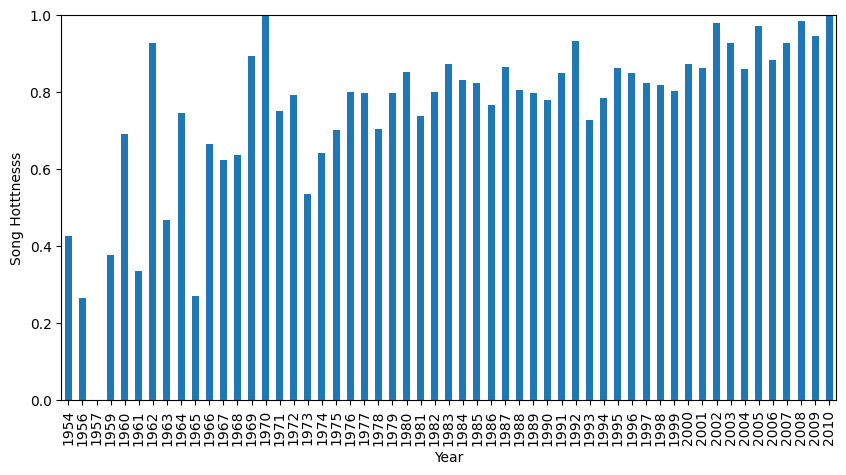

In [14]:
# Define the path to the dataset
dataset_path = '/opt/workspace/data/MillionSongSubset/*/*/*/*.h5'

# Create an empty list to store rows of data
table_rows = []

# Loop through each file in the dataset
for file_path in glob.glob(dataset_path):
    # Extract song_hotttnesss, year, song_id, genre, and title
    with h5py.File(file_path, 'r') as f:
        song_hotttnesss = f['/metadata/songs']['song_hotttnesss'][:]
        song_id = f['/metadata/songs']['song_id'][:]
        genre = f['/metadata/songs']['genre'][:]
        title = f['/metadata/songs']['title'][:]
        year = f['/musicbrainz/songs']['year'][:]
        
        # Loop through each song and add its information to the list of rows
        for i in range(len(song_hotttnesss)):
            # Check if song_hotttnesss and year exist for the current song
            if not np.isnan(song_hotttnesss[i]) and year[i]:
                # If year is 0, replace with "N/A"
                if year[i] == 0:
                    year_str = "N/A"
                else:
                    year_str = str(year[i])
                table_rows.append([song_id[i], title[i].decode("utf-8"), song_hotttnesss[i], year_str, genre[i]])
                
# Sort the list of rows by song_hotttnesss in descending order
table_rows.sort(key=lambda x: x[2], reverse=True)

# Convert the list of rows to a pandas DataFrame
df = pd.DataFrame(table_rows, columns=['Song ID', 'Song Name', 'Song Hotttnesss', 'Year', 'Genre'])

# Convert the 'Year' column to numeric type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create a bar chart of the maximum song_hotttnesss by year
fig, ax = plt.subplots(figsize=(10, 5))
max_hotttnesss = df.groupby('Year')['Song Hotttnesss'].max()
max_hotttnesss.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Song Hotttnesss')
ax.set_ylim([0, 1])
plt.show()


In [15]:
df = df.sort_values(by=['Song Hotttnesss'], ascending=False)
df.head(10)

,Song ID,Song Name,Song Hotttnesss,Year,Genre
0,b'SOAAXAK12A8C13C030',Immigrant Song (Album Version),1.000000,1970,b''
1,b'SOULTKQ12AB018A183',Nothin' On You [feat. Bruno Mars] (Album Version),1.000000,2010,b''
2,b'SOWFUUS12AB01800E7',If Today Was Your Last Day (Album Version),0.984347,2008,b''
3,b'SOOXLKF12A6D4F594A',Harder To Breathe,0.979837,2002,b''
4,b'SOMKGQN12A8C1339D2',Blue Orchid,0.972387,2005,b''
5,b'SOOPVJI12AB0183957',Just Say Yes,0.945995,2009,b''
6,b'SOUXEOI12A6D4FB18E',They Reminisce Over You (Single Version),0.932274,1992,b''
7,b'SOFDYGC12A6D4F9059',Inertiatic Esp,0.928617,2003,b''
8,b'SOKYXSZ12A6D4F6E92',The Loco-Motion,0.928367,1962,b''
9,b'SOZIMLB12AF72AD1CD',Innocence,0.927133,2007,b''


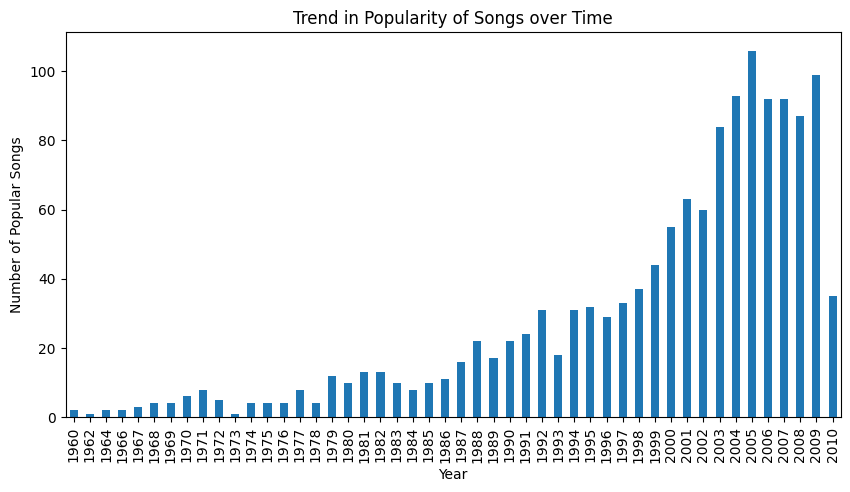

In [21]:
import h5py
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set path to MillionSongSubset dataset
dataset_path = '/opt/workspace/data/MillionSongSubset/*/*/*/*.h5'

# extract song metadata and year information
table_rows = []
for file_path in glob.glob(dataset_path):
    with h5py.File(file_path, 'r') as f:
        song_hotttnesss = f['/metadata/songs']['song_hotttnesss'][:]
        song_id = f['/metadata/songs']['song_id'][:]
        genre = f['/metadata/songs']['genre'][:]
        year = f['/musicbrainz/songs']['year'][:]
        
        for i in range(len(song_hotttnesss)):
            if not np.isnan(song_hotttnesss[i]) and year[i]:
                if year[i] == 0:
                    year_str = "N/A"
                else:
                    year_str = str(year[i])
                table_rows.append([song_id[i], song_hotttnesss[i], year_str, genre[i]])
                
# sort songs by hotttnesss in descending order
table_rows.sort(key=lambda x: x[1], reverse=True)

# create dataframe from song metadata and year information
df = pd.DataFrame(table_rows, columns=['Song ID', 'Song Hotttnesss', 'Year', 'Genre'])
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# count the number of popular songs by year
popularity_by_year = df[df['Song Hotttnesss'] >= 0.5].groupby('Year').size()

# create bar chart of the number of popular songs by year
fig, ax = plt.subplots(figsize=(10, 5))
popularity_by_year.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Popular Songs')
ax.set_title('Trend in Popularity of Songs over Time')
plt.show()
